In [1]:
import os

os.chdir("../")
import pandas as pd

In [2]:
root = "data/"

In [3]:
X_normal_df = pd.read_csv(root + "X_normal_df.csv", index_col=0)
y_normal_df = pd.read_csv(root + "y_normal_df.csv", index_col=0)
X_df = pd.read_csv(root + "X_df.csv", index_col=0)
y_df = pd.read_csv(root + "y_df.csv", index_col=0)

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

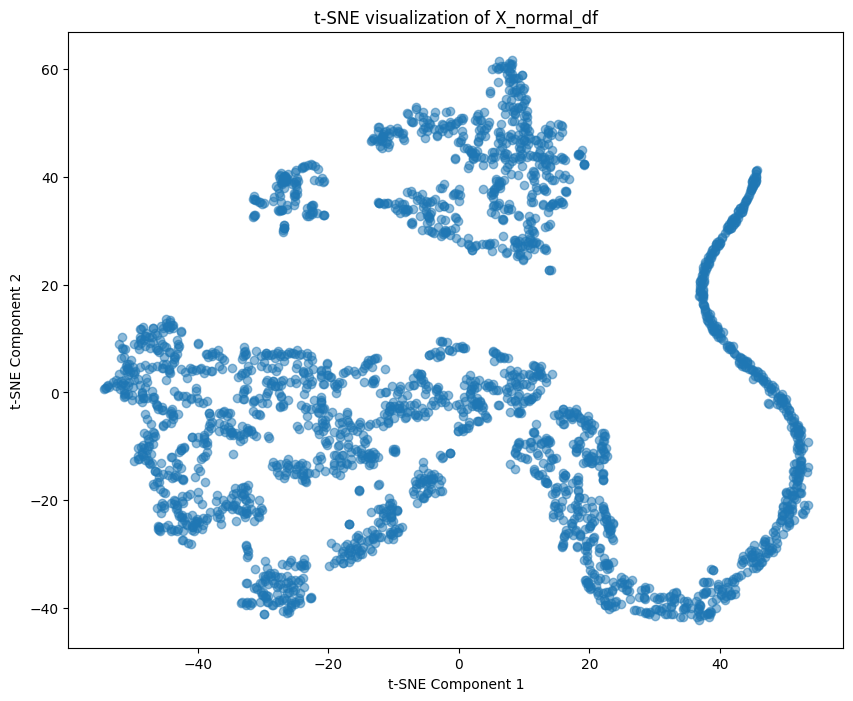

In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normal_df)

# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE visualization of X_normal_df')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [6]:
rootclasses = y_normal_df["class"].unique()
colors = {'EB':"#648FFF", 'DSCT':'#785EF0', 'RRL':'#DC267F', 'CEP':'#FFB000', "other": "black"}
rootclasses

array(['EB', 'DSCT', 'RRL', 'CEP'], dtype=object)

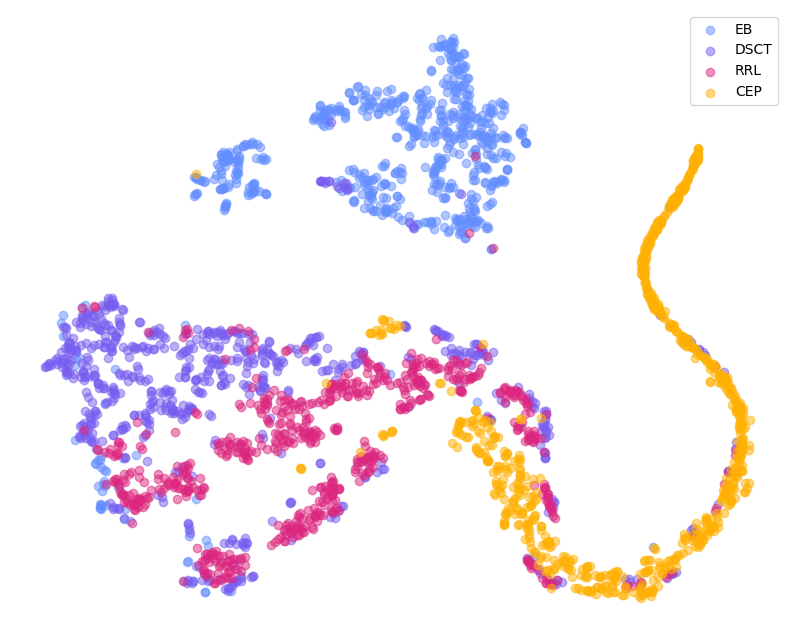

In [7]:
ax = plt.figure(figsize=(10, 8)).add_subplot(111)
# Create a scatter plot of the t-SNE results
othercount = 0
for cl in y_normal_df["class"].unique():
    mask = y_normal_df["class"] == cl
    try:
        cur_color=colors[cl]
        labelname=cl
    except KeyError:
        cur_color=colors["other"]
        othercount=othercount+1
        if othercount==1:
            labelname="other"
        else:
            labelname=None
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], color=cur_color, alpha=0.5, label=labelname)
            
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.axis('off')
plt.savefig("normal.png", dpi=300, bbox_inches="tight")
plt.show()

In [8]:
X_tsne = tsne.fit_transform(X_df)

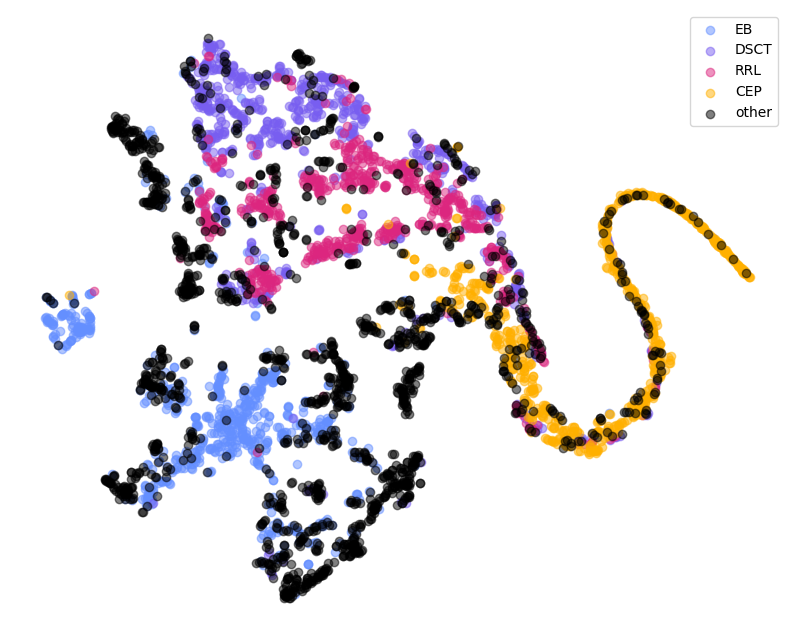

In [10]:
ax = plt.figure(figsize=(10, 8)).add_subplot(111)
# Create a scatter plot of the t-SNE results
othercount = 0
for cl in y_df["class"].unique():
    mask = y_df["class"] == cl
    try:
        cur_color=colors[cl]
        labelname=cl
    except KeyError:
        cur_color=colors["other"]
        othercount=othercount+1
        if othercount==1:
            labelname="other"
        else:
            labelname=None
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], color=cur_color, alpha=0.5, label=labelname)
            
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.axis('off')
plt.savefig("anom.png", dpi=300, bbox_inches="tight")
plt.show()


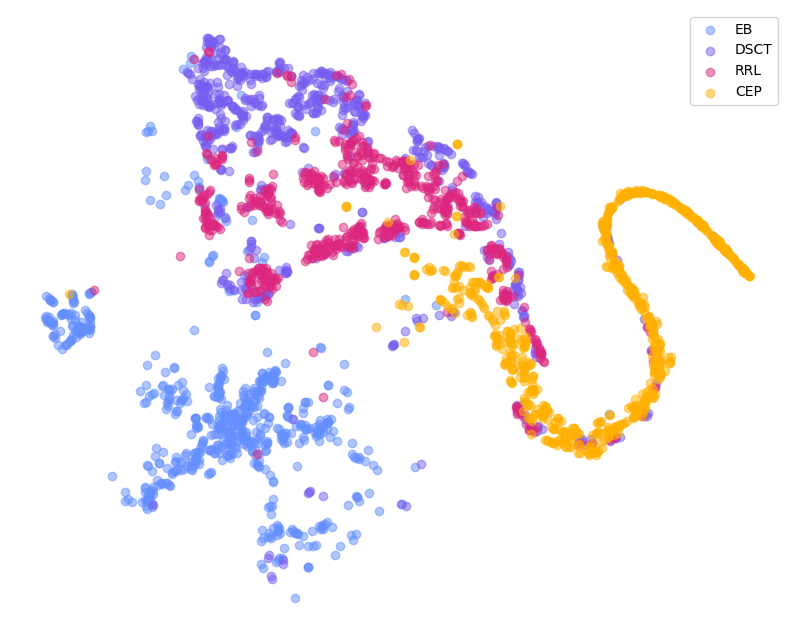

In [11]:
ax = plt.figure(figsize=(10, 8)).add_subplot(111)
# Create a scatter plot of the t-SNE results
othercount = 0
for cl in y_df["class"].unique():
    mask = y_df["class"] == cl
    try:
        cur_color=colors[cl]
        labelname=cl
    except KeyError:
        continue
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], color=cur_color, alpha=0.5, label=labelname)
            
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.axis('off')
plt.savefig("normal_before_anom.png", dpi=300, bbox_inches="tight")
plt.show()


In [13]:
rootclasses

array(['EB', 'DSCT', 'RRL', 'CEP'], dtype=object)

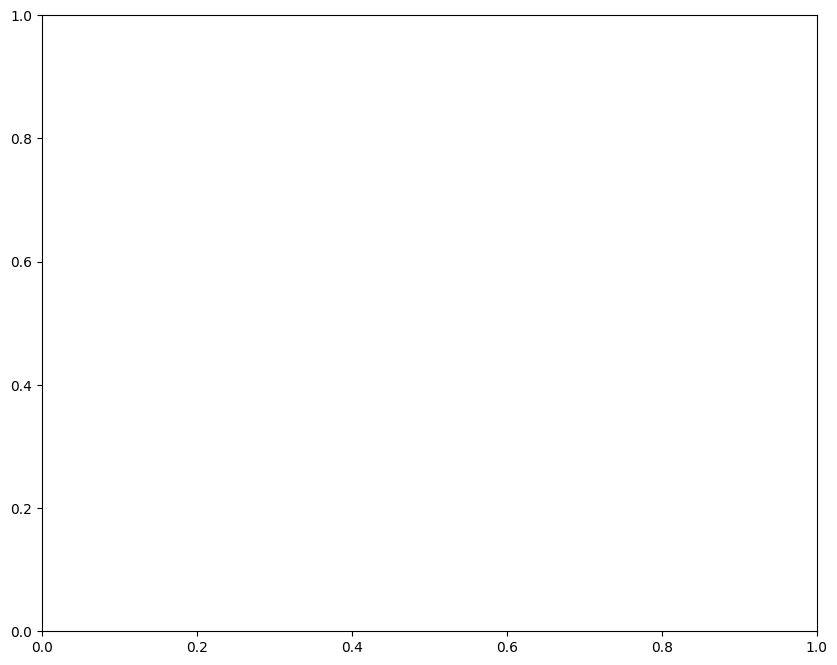

In [14]:
ax = plt.figure(figsize=(10, 8)).add_subplot(111)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_all_tsne = tsne.fit_transform(pd.concat([X_df, X_normal_df], axis=0))



PISN-STELLA_HYDROGENIC
PISN-MOSFIT
uLens-Single_PyLIMA
TDE
SNIcBL+HostXT_V19
KN_B19
uLens-Binary
SL-SNII
SNIc-Templates
SLSN-I+host
SNIa-SALT3
SNIb-Templates
SNII+HostXT_V19
SNIa-91bg
SL-SNIb
Mdwarf-flare
ILOT
KN_K17
CART
SNIIb+HostXT_V19
SNIb+HostXT_V19
SL-SN1a
SNII-NMF
SNIIn+HostXT_V19
SNII-Templates
SNIc+HostXT_V19
SNIax
SNIIn-MOSFIT
uLens-Single-GenLens
PISN-STELLA_HECORE
AGN
SLSN-I_no_host
SL-SNIc
dwarf-nova


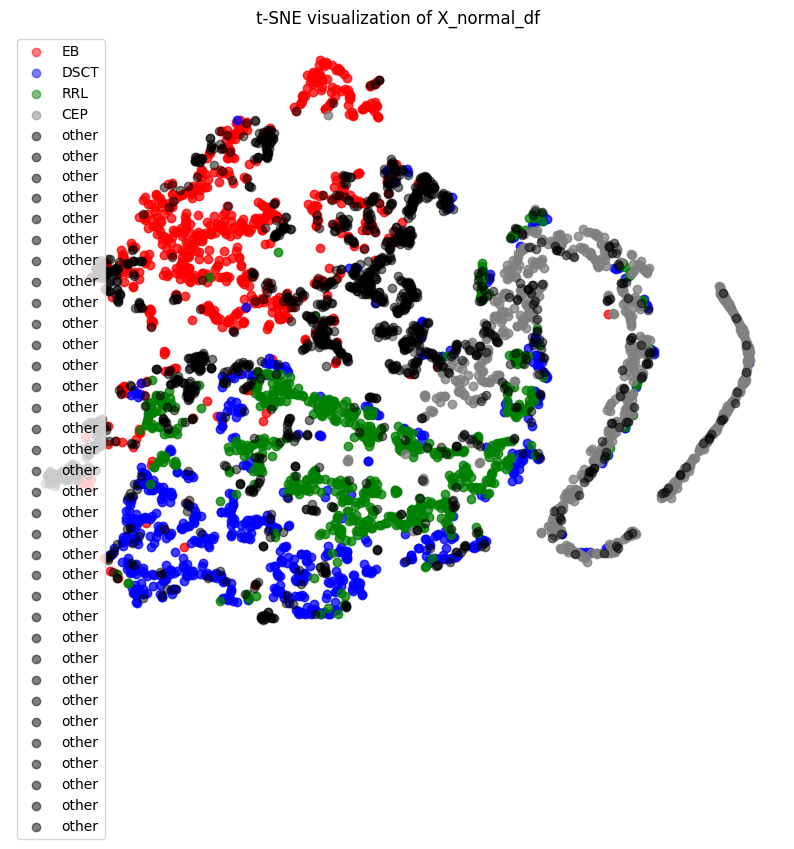

In [15]:
# Create a scatter plot of the t-SNE results
y_all_tsne = pd.concat([y_df, y_normal_df], axis=0)
ax = plt.figure(figsize=(10, 8)).add_subplot(111)

for cl in y_all_tsne["class"].unique():
  mask = y_all_tsne["class"] == cl
  if cl not in rootclasses:
    print(cl)
    cl = "other"
  ax.scatter(X_all_tsne[mask, 0], X_all_tsne[mask, 1], color=colors[cl], alpha=0.5, label=cl)
plt.legend()
plt.title('t-SNE visualization of X_normal_df')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.axis('off')
plt.show()



In [16]:
 y_df

,class
snid,
93852051,EB
133953454,DSCT
156704754,DSCT
94869465,DSCT
143158599,EB
...,...
69018019,dwarf-nova
97601275,dwarf-nova
97897233,dwarf-nova


In [17]:
y_normal_df

,class
snid,
93852051,EB
133953454,DSCT
156704754,DSCT
94869465,DSCT
143158599,EB
...,...
74872860,CEP
59809459,RRL
48283210,CEP
